In [1]:
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped", "open circuit potential": "current sigmoid"})
param = pybamm.ParameterValues("OKane2023")

exp1 = pybamm.Experiment(["Discharge at C/10 until 2.5 V", "Charge at C/10 for 3 hours"])
exp3 = pybamm.Experiment(["Discharge at C/10 for 90 minutes", "Charge at C/10 until 4.2 V",])
exp5 = pybamm.Experiment(["Discharge at C/10 until 2.5 V", "Charge at C/10 until 4.2 V",])

var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 50,  # negative particle
    "r_p": 20,  # positive particle
}

sim1 = pybamm.Simulation(model, parameter_values=param, experiment=exp1, var_pts=var_pts)
sol1 = sim1.solve(calc_esoh=False)
sim3 = pybamm.Simulation(model, parameter_values=param, experiment=exp3, var_pts=var_pts)
sol3 = sim3.solve(calc_esoh=False)
sim5 = pybamm.Simulation(model, parameter_values=param, experiment=exp5, var_pts=var_pts)
sol5 = sim5.solve(calc_esoh=False)

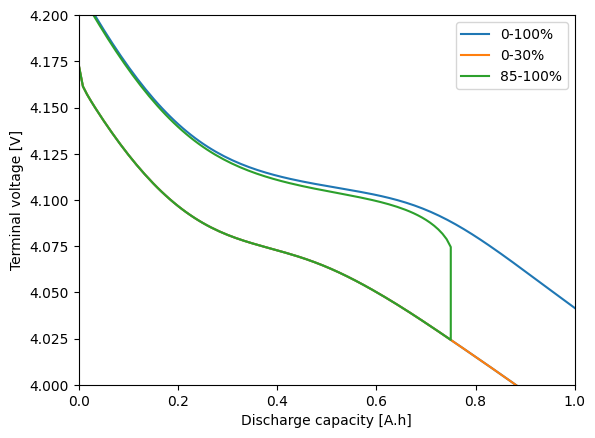

In [4]:
Q1 = sol1["Discharge capacity [A.h]"].entries
V1 = sol1["Terminal voltage [V]"].entries
Q3 = sol3["Discharge capacity [A.h]"].entries
V3 = sol3["Terminal voltage [V]"].entries
Q5 = sol5["Discharge capacity [A.h]"].entries
V5 = sol5["Terminal voltage [V]"].entries
plt.figure()
plt.plot(Q5,V5,label="0-100%")
plt.plot(Q1,V1,label="0-30%")
plt.plot(Q3,V3,label="85-100%")
plt.xlabel("Discharge capacity [A.h]")
plt.ylabel("Terminal voltage [V]")
plt.legend()
plt.xlim(0,1)
plt.ylim(4,4.2)
plt.savefig("/mnt/c/Users/sokane/pybamm_data/OKane2023_prelim/hysteresis_loop_zoomed_v3.png")
plt.show()

In [5]:
path = "/mnt/c/Users/sokane/pybamm_data/validation_data/"
exp5D_discharge = pd.read_csv(
    path+"Exp-5/0.1C voltage curves/Cell D/Expt 5 - cell D - RPT0 - 0.1C discharge data.csv"
).to_numpy()
Q5D_discharge = exp5D_discharge[:,3]
V5D_discharge = exp5D_discharge[:,1]
exp5D_charge = pd.read_csv(
    path+"Exp-5/0.1C voltage curves/Cell D/Expt 5 - cell D - RPT0 - 0.1C charge data.csv"
).to_numpy()
Q5D_charge_temp = exp5D_charge[:,3]
Q5D_charge = np.subtract(np.max(Q5D_discharge), Q5D_charge_temp)
V5D_charge = exp5D_charge[:,1]
exp5E_discharge = pd.read_csv(
    path+"Exp-5/0.1C voltage curves/Cell E/Expt 5 - cell E - RPT0 - 0.1C discharge data.csv"
).to_numpy()
Q5E_discharge = exp5E_discharge[:,3]
V5E_discharge = exp5E_discharge[:,1]
exp5E_charge = pd.read_csv(
    path+"Exp-5/0.1C voltage curves/Cell E/Expt 5 - cell E - RPT0 - 0.1C charge data.csv"
).to_numpy()
Q5E_charge_temp = exp5E_charge[:,3]
Q5E_charge = np.subtract(np.max(Q5E_discharge), Q5E_charge_temp)
V5E_charge = exp5E_charge[:,1]

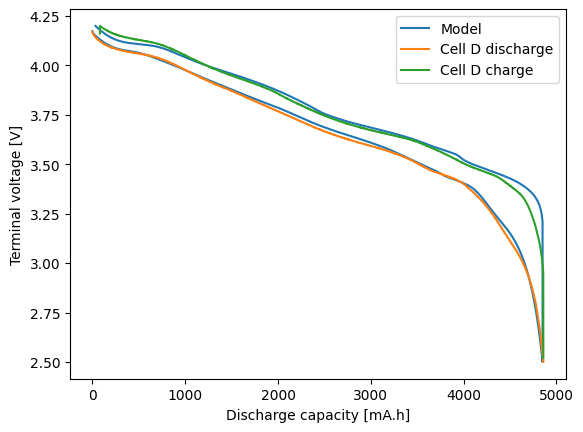

In [7]:
plt.figure()
plt.plot(1000*Q5,V5,label="Model")
plt.plot(Q5D_discharge,V5D_discharge,label="Cell D discharge")
plt.plot(Q5D_charge,V5D_charge,label="Cell D charge")
#plt.plot(Q5E_discharge,V5E_discharge,label="Cell E discharge")
#plt.plot(Q5E_charge,V5E_charge,label="Cell E charge")
plt.xlabel("Discharge capacity [mA.h]")
plt.ylabel("Terminal voltage [V]")
#plt.xlim(-0.1,1)
#plt.ylim(4,4.2)
plt.legend()
plt.savefig(path+"hysteresis_comparison.png")
plt.show()